### S09 T02 Supervisat_Regressio

- Exercici 1\
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

- Exercici 2\
Compara’ls en base al MSE i al R2 .

- Exercici 3\
Entrena’ls utilitzant els diferents paràmetres que admeten.

- Exercici 4\
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_delayed_clean_noind.csv')

In [3]:
df.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,...,IAD,TPA,810,0,0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,...,IAD,TPA,810,0,0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,...,IND,BWI,515,0,0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Drop the ones we are not using for correlation
df.drop(['Cancelled', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [5]:
df.head(1)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,810,0.0,0.0,0.0,0.0,0.0


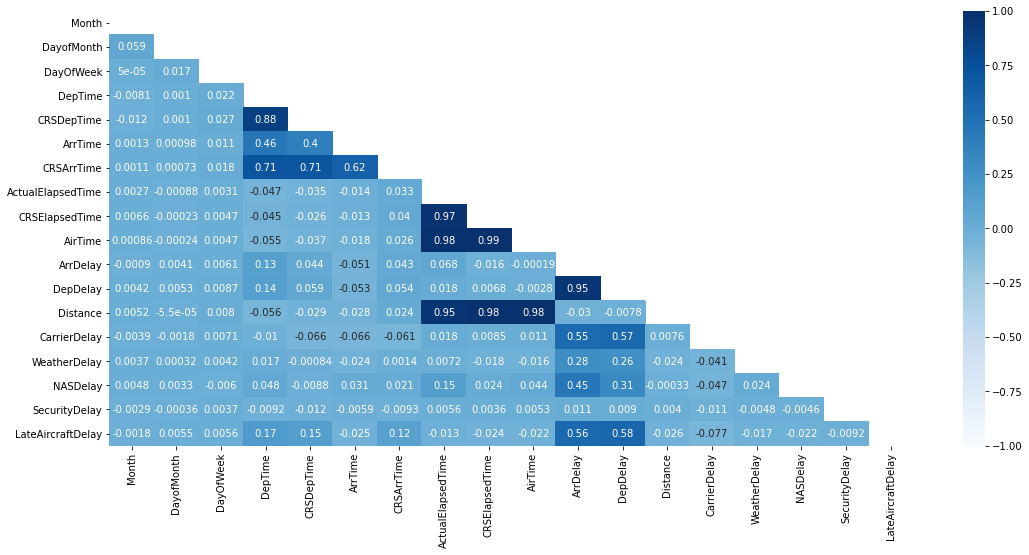

In [6]:
# corr plot looking for good predictors, the best relationships with the target 
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='Blues', vmin=-1, vmax=1);

#### Linear Regression

In [7]:
from sklearn import linear_model

In [8]:
# ArrDelay is the target
target = df['ArrDelay']
df.drop(['ArrDelay'], axis=1, inplace=True)
X = df
y = target

In [9]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [10]:
predictionsLR = lm.predict(X)
predictionsLR[0:5]

array([-13.99998161,   2.00000531,  13.99999745,  34.00001201,
        11.00000016])

In [11]:
# R2
lm.score(X,y)

0.9999999980703966

In [12]:
lm.coef_

array([-7.32939681e-07, -7.98876310e-08, -7.60503846e-08,  6.03992348e-08,
       -9.23591720e-08, -5.05923555e-08,  8.34614787e-08,  9.99999497e-01,
       -9.99999748e-01,  1.60698379e-07,  9.99999318e-01,  1.29394550e-08,
        5.52589252e-07,  5.67910344e-07,  5.35349063e-07,  5.10592838e-07,
        6.45760846e-07])

In [13]:
lm.intercept_

8.314352804461578e-06

In [14]:
# MSE
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(y, predictionsLR)

6.2220103225983685e-06

#### Decision Tree Regression 

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
regressor = DecisionTreeRegressor(random_state = 42)

In [18]:
regressor.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [19]:
predictionsDTR = regressor.predict(X)
predictionsDTR[0:5]

array([-14.,   2.,  14.,  34.,  11.])

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

In [25]:
rf.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [26]:
predictionsRF = rf.predict(X)
predictionsRF[0:5]

array([-14. ,   2. ,  14. ,  34. ,  11.3])

__________

In [27]:
print('Linear Regression R2:',lm.score(X,y), 'and MSE:', mean_squared_error(y, predictionsLR))
print('Decision Tree R2:',regressor.score(X,y), 'and MSE:', mean_squared_error(y, predictionsDTR))
print('Random Forest R2:',rf.score(X,y), 'and MSE:', mean_squared_error(y, predictionsRF))

Linear Regression R2: 0.9999999980703966 and MSE: 6.2220103225983685e-06
Decision Tree R2: 1.0 and MSE: 0.0
Random Forest R2: 0.9997448909633575 and MSE: 0.8225996501710509


_____________

### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [31]:
scores = cross_val_score(lm, X, y, scoring='r2', cv=5)
scores   

array([0.99999999, 1.        , 1.        , 1.        , 1.        ])

In [32]:
scores = cross_val_score(regressor, X, y, scoring='r2', cv=5)
scores   

array([0.99670164, 0.99744189, 0.99760622, 0.99638097, 0.99686966])

In [33]:
scores = cross_val_score(rf, X, y, scoring='r2', cv=5)
scores   

array([0.99832436, 0.99874973, 0.99866573, 0.99781105, 0.99850331])

_______